# Sobre el dataset 2

## Fuente y tipo de datos
Se obtienen de kaggle:
https://www.kaggle.com/datasets/tawsifurrahman/covid19-radiography-database

Los datos son imagenes de radiografías de pacientes COVID-19 en Colombia.
Primaria (imágenes de rayos X) con anotaciones derivadas

## Características
Número de registros: Se tienen diferentes clases de imagenes "COVID", "Lung_Opacity", "Normal", "Viral Pneumonia".

Atributos: En los metadatos tenemos las columnas FILE NAME,FORMAT,SIZE y URL

Tamaño de los datos: 778M

## Nivel de Documentación disponible y posibles aplicaciones

1. Entrenamiento de modelos de clasificación de imágenes médicas
2. Segmentación de lesiones pulmonares
3. Investigación en COVID-19 y comparación con otras neumonías
4. Benchmark en técnicas de visión por computadora en imágenes médicas

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tawsifurrahman/covid19-radiography-database")


print("Path to dataset files:", path)

100%|██████████| 778M/778M [03:36<00:00, 3.77MB/s] 

Extracting files...


Path to dataset files: /home/david/.cache/kagglehub/datasets/tawsifurrahman/covid19-radiography-database/versions/5


In [6]:
import os
import pandas as pd
# Clases del dataset
classes = ["COVID", "Lung_Opacity", "Normal", "Viral Pneumonia"]

base_path = f'{path}/COVID-19_Radiography_Dataset/'
# --- Características básicas ---
resumen = []
for clase in classes:
    img_dir = os.path.join(base_path, clase, "images")
    n_imgs = len([f for f in os.listdir(img_dir) if f.lower().endswith((".png", ".jpg", ".jpeg"))])
    
    # Leer metadata asociada
    metadata_file = os.path.join(base_path, f"{clase}.metadata.xlsx")
    if os.path.exists(metadata_file):
        df = pd.read_excel(metadata_file)
        n_atributos = df.shape[1]
    else:
        n_atributos = "N/A"
    
    resumen.append([clase, n_imgs, n_atributos])

df_resumen = pd.DataFrame(resumen, columns=["Clase", "Número de imágenes", "Atributos (metadata)"])
display(df_resumen)

,Clase,Número de imágenes,Atributos (metadata)
0,COVID,3616,4
1,Lung_Opacity,6012,4
2,Normal,10192,4
3,Viral Pneumonia,1345,4


In [13]:
# Mostrar los primeros registros de los metadatos de cada clase
for clase in classes:
    metadata_file = os.path.join(base_path, f"{clase}.metadata.xlsx")
    if os.path.exists(metadata_file):
        print(f"\n=== Metadatos de la clase: {clase} ===")
        df = pd.read_excel(metadata_file, engine="openpyxl")
        display(df.head())  # muestra las primeras filas en Jupyter
        print(f"Número total de registros: {len(df)}")
        print(f"Número de atributos: {df.shape[1]}")
    else:
        print(f"No se encontró archivo de metadatos para {clase}")


=== Metadatos de la clase: COVID ===


,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...


Número total de registros: 3616
Número de atributos: 4

=== Metadatos de la clase: Lung_Opacity ===


,FILE NAME,FORMAT,SIZE,URL
0,Lung_Opacity-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
1,Lung_Opacity-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
2,Lung_Opacity-3,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
3,Lung_Opacity-4,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
4,Lung_Opacity-5,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...


Número total de registros: 6012
Número de atributos: 4

=== Metadatos de la clase: Normal ===


,FILE NAME,FORMAT,SIZE,URL
0,NORMAL-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
1,NORMAL-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
2,NORMAL-3,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
3,NORMAL-4,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
4,NORMAL-5,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...


Número total de registros: 10192
Número de atributos: 4

=== Metadatos de la clase: Viral Pneumonia ===


,FILE NAME,FORMAT,SIZE,URL
0,Viral Pneumonia-1,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
1,Viral Pneumonia-2,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
2,Viral Pneumonia-3,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
3,Viral Pneumonia-4,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
4,Viral Pneumonia-5,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...


Número total de registros: 1345
Número de atributos: 4


Mostrando ejemplos de la clase: COVID


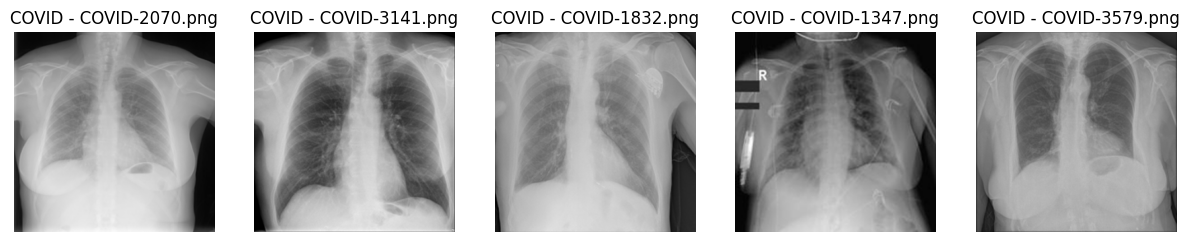

Mostrando ejemplos de la clase: Lung_Opacity


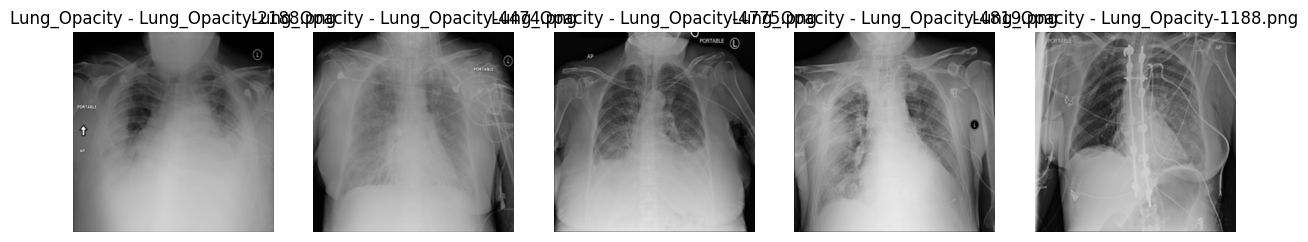

Mostrando ejemplos de la clase: Normal


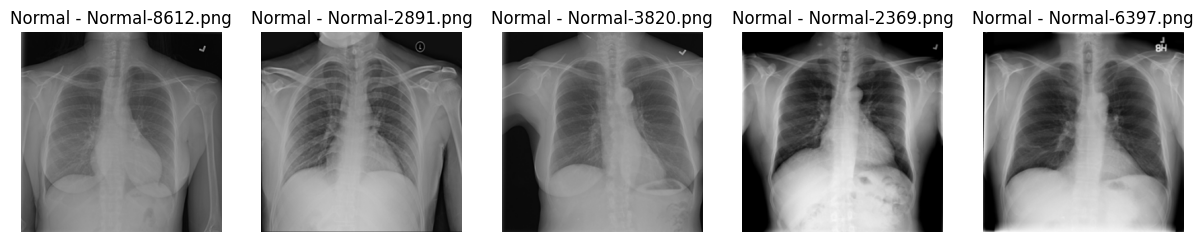

Mostrando ejemplos de la clase: Viral Pneumonia


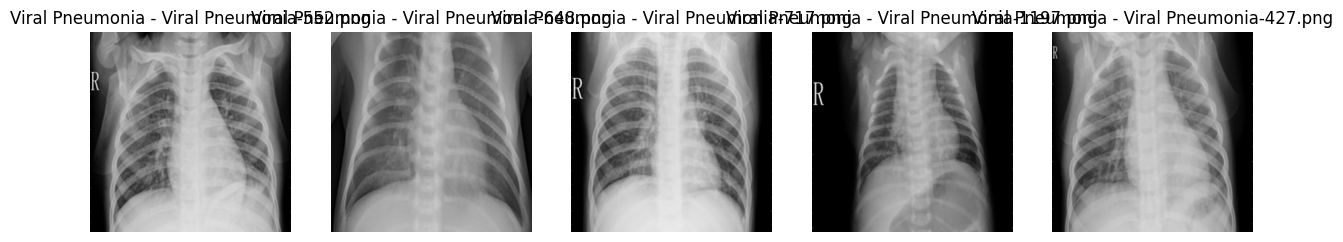

In [10]:
## Se puede visualizar algunas imágenes de la base de datos
import matplotlib.pyplot as plt
from PIL import Image

# Función para mostrar imágenes de una clase
def mostrar_imagenes_de_clase(clase, num_imagenes=5):
    carpeta = os.path.join(base_path, clase, "images")
    imagenes = os.listdir(carpeta)
    imagenes = [img for img in imagenes if img.lower().endswith((".png", ".jpg", ".jpeg"))]
    # Tomar algunas al azar
    import random
    seleccion = random.sample(imagenes, min(num_imagenes, len(imagenes)))
    plt.figure(figsize=(15, 5))
    for i, img_name in enumerate(seleccion):
        img_path = os.path.join(carpeta, img_name)
        img = Image.open(img_path).convert("RGB")
        plt.subplot(1, num_imagenes, i+1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"{clase} - {img_name}")
    plt.show()

# Mostrar imágenes para cada clase
for clase in classes:
    print(f"Mostrando ejemplos de la clase: {clase}")
    mostrar_imagenes_de_clase(clase, num_imagenes=5)
